# Predicting Home Values


# Goals
* Discover drivers that have a string relationship to predict values.
* Use drivers to develop a machine learning model to make accurate predictions. 
* Home values will be compared to actual home values. 
* This information could be used to better understand changing markets.

## Imports

In [1]:
# importing the necessary libraries to run the code
from env import get_db_url
from wrangle import wrangle_telco_data, split_telco_data
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats


from explore import dsl_v_churn, contract_type_v_churn, payment_v_churn
from explore import monthly_v_churn, hyp_month_v_churn, t_test_monthly_churn, chi2_payment_churn

from modeling import model_prep_data, model_decision_tree, model_knn
from modeling import model_random_forest, model_log, model_knn_test

import warnings
warnings.filterwarnings("ignore")

## Acquire

* Aquired the data from CodeUp database
* Data size ---- rows and --- columns.
* Each obsevation represent the sale of a property
* Each column reperesents a feature or data point of that sale

## Prepare

* Removed columns that did not contain useful information
* Checked for nulls in the data 
* Checked that column data types were appropriate
* Split data into train, validate and test (approx. --/--/--)
* Outliers have not been removed for this iteration of the project

In [2]:
# used my wrangle function that acquires, preps and cleans the data
df = wrangle_telco_data()

# splits data train, validate, test
train, validate, test = split_telco_data(df)

# Data At a Glance

In [3]:
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5911,8319-QBEHW,Male,0,No,Yes,26,No,No phone service,No,Yes,...,0,1,0,1,0,0,0,0,0,0
2479,3547-LQRIK,Female,0,Yes,No,47,Yes,Yes,No internet service,No internet service,...,0,0,0,1,0,0,1,0,1,0
5889,8280-MQRQN,Female,0,No,No,1,Yes,No,No,No,...,0,1,1,0,0,0,0,0,0,1
6087,8626-PTQGE,Male,0,No,No,69,No,No phone service,Yes,Yes,...,1,1,0,0,1,0,0,0,0,0
785,1142-IHLOO,Female,0,No,No,51,Yes,No,No,No,...,1,0,0,1,0,1,0,1,0,0


In [4]:
train.describe()


,tenure,monthly_charges,total_charges,baseline_prediction,gender_Male,senior_citizen_1,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
count,4225.000000,4225.000000,4216.000000,4225.0,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,...,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000
mean,32.500828,65.056142,2303.420292,0.0,0.508639,0.161893,0.488521,0.306272,0.906982,0.093018,...,0.395503,0.593846,0.265325,0.216095,0.235503,0.439053,0.218462,0.217515,0.336805,0.224852
std,24.532563,30.268493,2271.540183,0.0,0.499985,0.368397,0.499927,0.460999,0.290492,0.290492,...,0.489016,0.491172,0.441559,0.411628,0.424363,0.496330,0.413251,0.412604,0.472673,0.417534
min,0.000000,18.250000,18.850000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,35.650000,413.550000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,70.400000,1406.325000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,90.150000,3871.775000,0.0,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,72.000000,118.750000,8672.450000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Explore

## * Are customers with DSL more or less likely to churn?

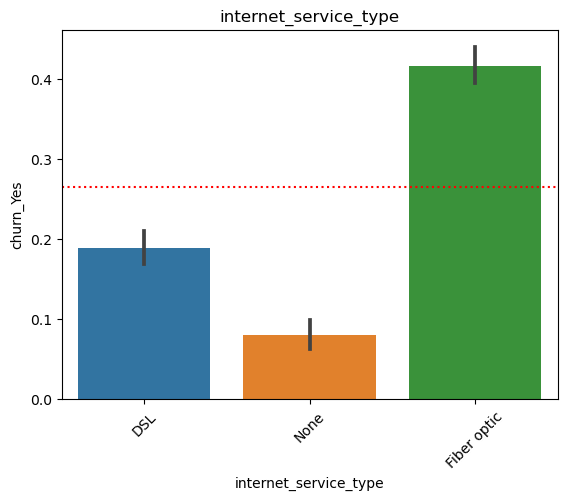

In [5]:
dsl_v_churn()

### Takeaways:

* DSL is not a strong reason why customers churn
* Customers with Fiber Optics have more churn than DSL

## * What month are customers most likely to churn and does that depend on their contract type?

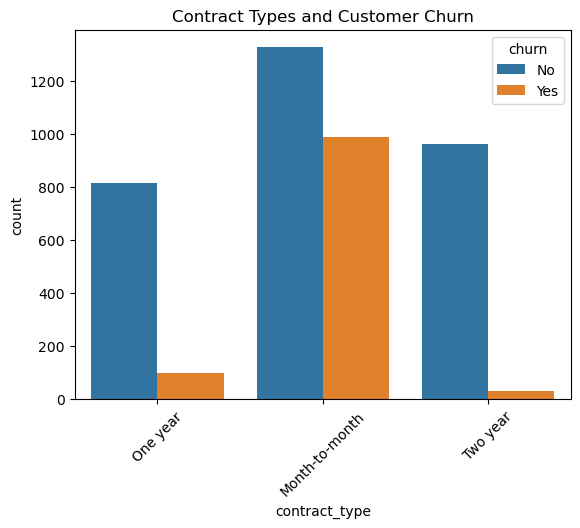

Top churned from Month to Month Contraacts


,churn_Yes,position
tenure,,
1,228,1


Top churned from One Year Contraacts


,churn_Yes,position
tenure,,
54,6,1


Top churned from Two Year Contraacts


,churn_Yes,position
tenure,,
71,4,1


In [6]:
contract_type_v_churn()

### Takeaways:
* Most churn happens with the month-to-month customer
* Customers with the most retention are on two year plans
* The month most churn happens is the first month of contract with month to month customers 

## * Is there a service or option that is associated with more churn than expected?

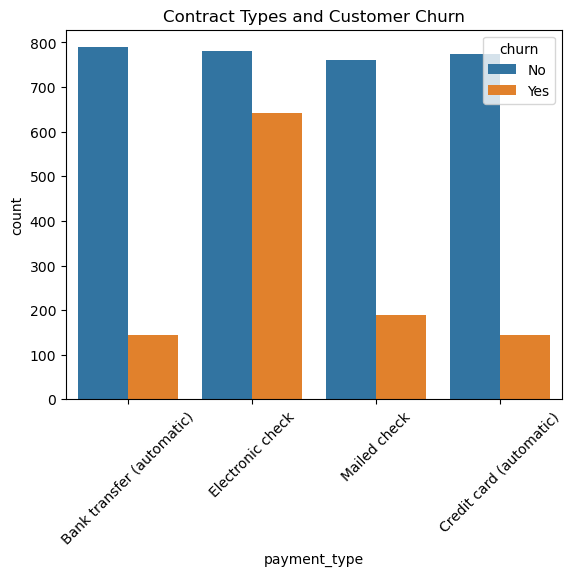

In [7]:
payment_v_churn()

### Takeaways:
* There are a total of 1423 Electronic Check customers 
* 643 of those have churn thats 45% churn rate
* It is more that all the payment methods combined

## * Do customers who churn have a higher average monthly spend than those who don't?

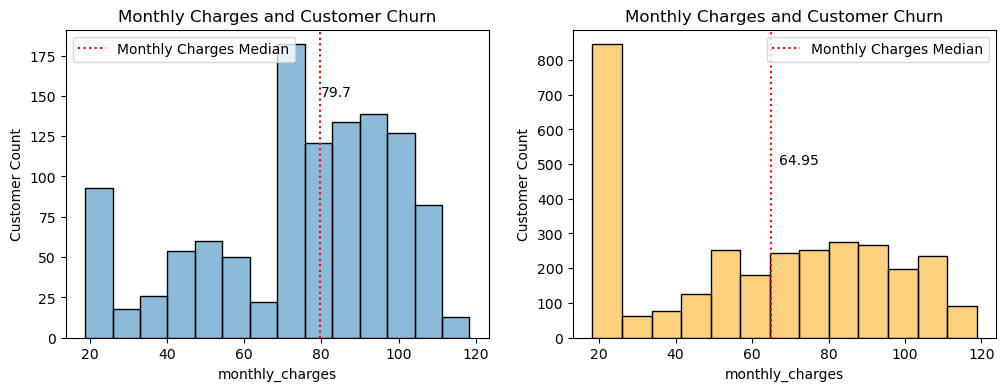

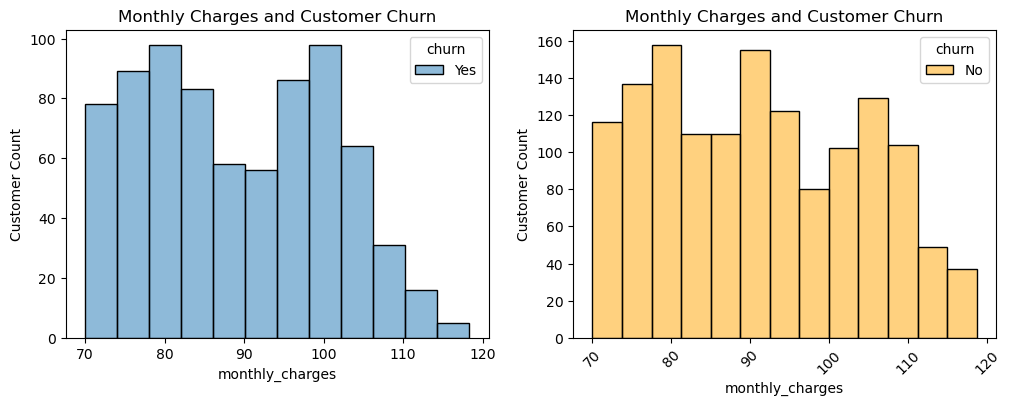

In [8]:
monthly_v_churn()

### Takeaways
* The customers who pay more than \$70 have the highest churn rate
* There are 762 customers who churn
* The median monthly payment for customers who churns is \$79.70
* The median monthly payment for customers who don't churn is \$64.95

# Evaluation Question:
## * Are charges of customers who churn significantly greater than who do not churn?

#### *  I will preform a T-test to show if that customers who spend more monthly have a greater churn rate

---
+ I will use a confidence interval of 95%
+ The resulting alpha is .05

### Hypothesis:

* H-o = Charges of customers is equal or less than who don't churn.
* H-a = Charges of customers is greater than who don't churn.

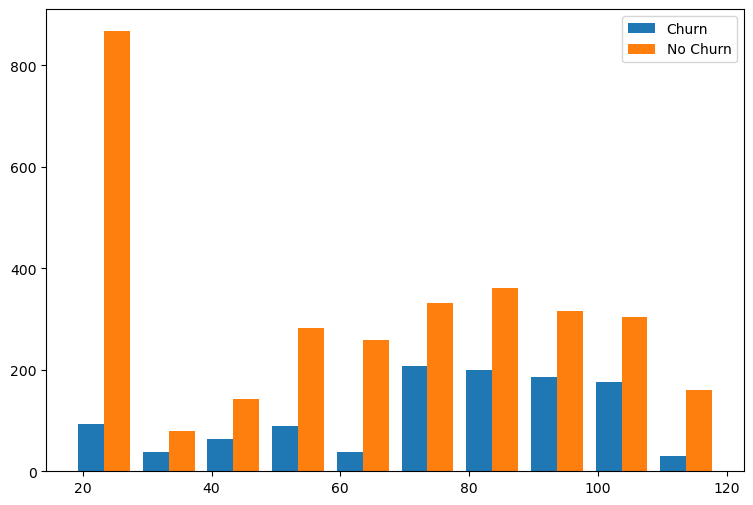

In [9]:
hyp_month_v_churn()

In [10]:
t, p = t_test_monthly_churn()
print(f'p = {p}')
print(f't = {t}')

p = 9.41633723579986e-42
t = 13.796475652581572


#### The p-value is less than the alpha. Therefore, we have evidence to support that the mean charge difference of customer who pay more mothly is significantly different from the mean charge difference of customer who pay less mothly. Based on this, and the ~\$15 difference in medians, observed in the train data, I believe that using "monthly_charges" during modeling will provide a moderate improvement in the model's accuracy.

# Evaluation Question:
## * Is there a service or option that is associated with more churn than expected?

#### * Customer with Manual Payments are more or less likely to churn?

### Hypothesis:

* H-o = There is no relation in churn between customers with auto and manual payments.
* H-a = There is a relation in churn between customers with auto and manual payments.

In [11]:
chi2, p = chi2_payment_churn()
print(f'p = {p}')
print(f'chi^2 = {chi2}')

p = 5.412195802407718e-84
chi^2 = 388.97403778913014


#### The p-value is less than the alpha. Therefore, we have evidence to support that payment type and churn have relationship. Based on this, I believe using payment type during modeling will provide a moderate improvement in the model's accuracy.

# Evaluation Summary:

* "internet_service_type" category: Fiber Optics was found to be a driver of "churn"
* "contract_type" was found to be a driver of "churn" due to the high number of customers churning on month to month contracts
* "payment_type" was found to be a driver of "churn" due to the high number of customers churning on with manual payments
* "monthly_charges" was found to be a driver of "churn"
* The median charges for customers who churned \$\ $74.70 while the non churn customers was $64.95

* "internet_service_type" category: DSL was not found to be a driver of "churn"

## Modeling

* Customers who do not churn makeup 73% of the data
* By assuming non-churner a 73% baseline accuracy is achieved
* I will compare how each model runs using various hyperparameters
* I will compare the train with validate data
* I will use accuracy as my evaluation metric
* The best preforming model will be used on my test data

### Prep Data

In [12]:
X_train, y_train, X_validate, y_validate, X_test, y_test = model_prep_data()

# Decision Tree

In [13]:
model_decision_tree(X_train, X_validate, y_train, y_validate)

Accuracy of Decision Tree on train data is: 0.7742011834319527
Accuracy of Decision Tree on validate data is: 0.7643718949609652


* Decision Tree accuracy is 3 points better than baseline


## KNN model

In [14]:
model_knn(X_train, X_validate, y_train, y_validate)

Accuracy of KNN on train data is: 0.7848520710059171
Accuracy of KNN on validate data is: 0.7558552164655784


* KNN accuracy is 2 points better than baseline


# Random Forest Model

In [15]:
model_random_forest(X_train, X_validate, y_train, y_validate)

Accuracy of Random Forest on train data is: 0.7765680473372781
Accuracy of Random Forest on validate data is: 0.7665010645848119


* Random Forest accuracy is 3 points better than baseline


# Log Regeression Model

In [16]:
model_log(X_train, X_validate, y_train, y_validate)

Accuracy of Log Regression on train data is: 0.3493491124260355
Accuracy of Log Regression on validate data is: 0.3598296664300923


* Log Regression accuracy is 35 points worse than baseline


# Comparing Summary
* Decision Tree, Random Forest, and KKN models all performed similar to each other
* The KNN model had a slighlty lower accuracy than the three best models but seemed uniform mostly with results.
* The Logistic Regression model preformed poorly. I may need to revisit and see where mistakes may have been made.

* The KNN Model was selected to run the test data. This model also was 2 points better than baseline but seemed to be most stable when charting the resukts.

# KNN Model Testing

In [17]:
model_knn_test(X_train, X_test, y_train, y_test)

Accuracy of KNN on test data is: 0.7388218594748048



## Modeling Summary

* Decision Tree, Random Forest, and KKN models all performed similar to each other
* The KNN model had a slighlty lower accuracy than the three best models but seemed uniform mostly with results.
* Knn Model preformed slighlty better than baseline

# Conclusion

## Exploration Summary
* Customers with Fiber Optics have more churn than DSL.
* Encouraging customers to be on automatic payment plan will seems to reduce churn.
* 643 manual check writers churned which is a 45% churn rate for all payment types.
* When the monthly charges reached approximate \$70 the churn rate rised.
* The median monthly payment for customers who churns is \$79.70


## Modeling
* The final model failed to significantly outperform the baseline. Possible reasons include:

“payment_type” and “contract_type” may not have had meaningful relation to who will churn.
Since monthly charges" seems to be a larger contributor to churn, adding more of the services to see which service may be contributing to churn. 

## Recommendations
* This may be simple enough but have a column for reason for caneling service. Helpful to pinpoint issues and improve service.

## Next Steps
* Explore the relation of Fiber Optics to churn. Services like tech support or streaming services could also be explored.

In [28]:
has_churned = [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]
df = pd.DataFrame(has_churned, columns=['churned'])

In [29]:
df

,churned
0,1
1,1
2,0
3,0
4,1
5,0
6,0
7,0
8,0
9,0


In [32]:
baseline = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
df1 = pd.DataFrame(baseline, columns=['baseline'])
df1

,baseline
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [4]:
from sklearn.metrics import confusion_matrix

true_labels = [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]
predicted_labels = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

cm = confusion_matrix(true_labels, predicted_labels)
print(cm.T)


[[8 3]
 [0 0]]


In [3]:
from sklearn.metrics import confusion_matrix

true_labels = [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]
predicted_labels = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

cm = confusion_matrix( predicted_labels, true_labels)
print(cm)

[[8 3]
 [0 0]]
